In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd

# load education data
original_data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', index_col=[0])

/var/folders/h2/6lzgplxj5ng29b2_5ccc99fh0000gn/T/ipykernel_2780/2638854413.py:4: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', index_col=[0])


# Database description

In [3]:
print("articles number in original database : ", len(original_data))
print("columns number in original database : ", len(original_data.columns))
nb = 100*original_data.count().sum()/(len(original_data)*len(original_data.columns))
print("filled data % : {:.2f}%".format(nb))

print(original_data.count().sum())
print(len(original_data)*len(original_data.columns))

articles number in original database :  320772
columns number in original database :  161
filled data % : 23.31%
12035726
51644292


In [4]:
original_data.reset_index(level=0, inplace=True)

# Database cleaning

## Column without enouch data deletion

In [5]:
# Separate string columns and float columns of dataframe
data_str = original_data[original_data.columns[original_data.dtypes != float]]
data_float = original_data[original_data.columns[original_data.dtypes == float]]

In [6]:
# DATABASE SIMPLIFICATION : Delete dataframe columns with value number 
# inferior to "limit_no_data_int"
limit_no_data_float = 100000

print("float columns number: ", len(data_float.columns))
print("string columns number: ", len(data_str.columns))
# Filter float columns dataframe
data_float = data_float[data_float.count()
                     [data_float.count() > limit_no_data_float].index]

limit_no_data_str = 20000

data_str = data_str[data_str.count()
                     [data_str.count() > limit_no_data_str].index]

print("float columns number after not enough data column deletion: ", 
      len(data_float.columns))

print("string columns number after not enough data column deletion: ", 
      len(data_str.columns))

data_tmp = pd.concat([data_str, data_float], axis=1, copy=False)

data_tmp

float columns number:  106
string columns number:  56
float columns number after not enough data column deletion:  20
string columns number after not enough data column deletion:  51


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,0.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,0.0,0.0
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Aberrant values deletion

271


NameError: name 'np' is not defined

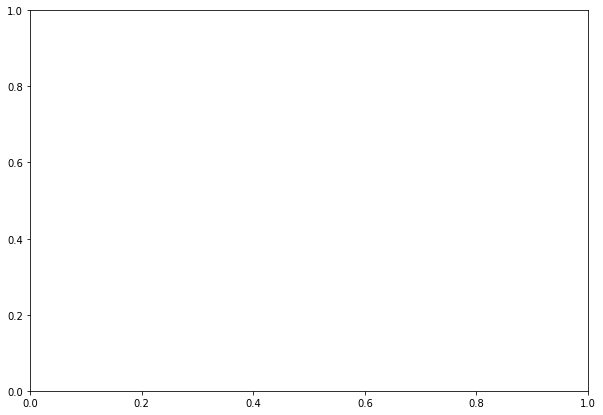

In [7]:
# Put NaN in weighted columns when it's inferior to 0g or superior to 100g
nutrition_columns = ['fat_100g', 'saturated-fat_100g', 
                 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 
                 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 
                 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 
                 'calcium_100g', 'iron_100g']

data_nutri_filter = original_data[nutrition_columns].copy()

data_nutri_bool = (0 <= data_nutri_filter) & \
                                       (data_nutri_filter <= 100)

data_nutri_filter = data_nutri_filter.mask(~data_nutri_bool)

data_float[nutrition_columns] = data_nutri_filter

# Print columns list with number of aberrent values deleted
print((original_data[nutrition_columns].count() - data_nutri_filter.count()).sum())

# Display 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
N = len(nutrition_columns)
width = 0.5 

ind = np.arange(N)    # the x locations for the groups
plt.barh(ind, original_data[nutrition_columns].count() - data_nutri_filter.count(), width, color='royalblue')
plt.ylabel('Nutritional column', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.title('Aberrant value count', fontsize=20)
plt.yticks(ind, nutrition_columns, fontsize=13)
plt.xticks(fontsize=15)
plt.show()

## Outliers deletion on continuous variables

In [ ]:
# Define function to delete outlier in some column
def deleteOutlier(col, quantile):
    col_numeric = pd.to_numeric(col.to_numpy(), errors='coerce')
    # Create boolean list for outlier : x < Q1 - 1.5 * IQR | x > Q3 + 1.5 * IQR
    Q1 = col[~np.isnan(col_numeric)].quantile(quantile)
    Q3 = col[~np.isnan(col_numeric)].quantile(1-quantile)
    IQR = Q3 - Q1
    out_IQR_col = (col_numeric < (Q1 - 3 * IQR)) | (col_numeric > (Q3 + 3 * IQR))
    new_col = col
    new_col[out_IQR_col] = np.nan
    return new_col

In [ ]:
# Apply function to delete outlier in quantity columns
float_columns_remaining = ["energy_100g"]

data_fcr_filter = original_data[float_columns_remaining].copy()

data_fcr_filter = data_fcr_filter.apply(lambda col : deleteOutlier(col, 0.25))

data_float[float_columns_remaining] = data_fcr_filter

# Print columns list with detected outliers in each column
print(original_data[float_columns_remaining].count() - 
      data_fcr_filter.count())

## Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

values = original_data["energy_100g"][~np.isnan(original_data["energy_100g"])]
values_filter = data_float["energy_100g"][~np.isnan(data_float["energy_100g"])]
axes[0].boxplot(values)
axes[0].set_title("energy_100g \n Before outlier deletion", fontdict = {
                             'fontsize': 20,
                            })
plt.sca(axes[0])
plt.yticks(size=20)

axes[1].boxplot(values_filter)
axes[1].set_title("energy_100g \n After outlier deletion", fontdict = {
                             'fontsize': 20,
                            })
plt.sca(axes[1])
plt.yticks(size=20)


plt.show()

In [ ]:
data_filter = pd.concat([data_nutri_filter, data_fcr_filter], axis=1, copy=False)

fig, axes = plt.subplots(nrows=len(data_filter.columns), ncols=2,figsize=(20,50))

cpt = 0
for col in data_filter.columns:
    values = original_data[col][~np.isnan(original_data[col])]
    values_filter = data_filter[col][~np.isnan(data_filter[col])]
    axes[int(cpt), 0].boxplot(values)
    axes[int(cpt), 0].set_title(col, fontdict = {
                                 'fontsize': 15,
                                })
    axes[int(cpt), 1].boxplot(values_filter)
    axes[int(cpt), 1].set_title(col, fontdict = {
                                 'fontsize': 15,
                                })
    cpt = cpt + 1

plt.show()

In [ ]:
data_clean = pd.concat([data_str, data_float], axis=1, copy=False)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

original_data_range = original_data
original_data_range.sort_values(by=["created_datetime"], inplace=True)
    
# Plot heatmap of boolean original dataframe
original_data_bin = ~original_data_range.isnull() # Create boolean dataframe according cell is NaN or not
sns.heatmap(original_data_bin, ax=axes, cbar=False)
axes.set_title("Occupation avant nettoyage", fontdict = {
                             'fontsize': 20,
                            })
plt.sca(axes)
plt.yticks(size=10)
plt.xticks(size=10)

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

data_clean_range = data_clean
data_clean_range.sort_values(by=["created_datetime"], inplace=True)

# Plot heatmap of boolean cleaned dataframe
data_bin = ~data_clean_range.isnull()
sns.heatmap(data_bin, ax=axes, cbar=False)
axes.set_title("Occupation après nettoyage", fontdict = {
                             'fontsize': 20,
                            })
plt.sca(axes)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()

In [ ]:
print("articles number in simplified database : ", len(data_clean))
print("columns number in simplified database : ", len(data_clean.columns))
nb = 100*data_clean.count().sum()/(len(data_clean)*len(data_clean.columns))
print("filled data % : {:.2f}%".format(nb))

In [ ]:
# Add "fruits-vegetables-nuts_100g" column for nutriscore process
data_clean["fruits-vegetables-nuts_100g"] = original_data["fruits-vegetables-nuts_100g"]

In [ ]:
data_clean.to_csv("fr.openfoodfacts.org.products.clean.csv")